### 파이썬 머신러닝
## 텍스트 데이터
---
# IMDb 리뷰 다루기

- 데이터 전체 :  말뭉치 (corpus)
- 샘플 하나 : 문서 (document)
- 자연어 처리 : NLP(Natural language processing)
- 한국어는 하나의 **어절**이 여러 개의 의미 단위로 구성되는 경우가 있으므로 **형태소 분석**을 해야 한다

- IMDb 영화 리뷰 데이터셋 : https://github.com/rickiepark/introduction_to_ml_with_python/
blob/master/data/aclImdb_v1.tar.gz
- 압축을 풀어 data/aclImdb 폴더로 옮긴다
> ```
./data
./data/aclImdb
./data/aclImdb/test
./data/aclImdb/test/pos
./data/aclImdb/test/neg
./data/aclImdb/train
./data/aclImdb/train/pos
./data/aclImdb/train/neg
./data/aclImdb/train/unsup
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
from sklearn.datasets import load_files

imdb_train = load_files('data/aclImdb/train/')
imdb_test = load_files('data/aclImdb/test/')

np.save('imdb.npy',[imdb_train, imdb_test])
'''

In [2]:
imdb_train, imdb_test = np.load('imdb.npy')

- imdb_train 과 imdb_test 내용 확인

In [5]:
type(imdb_train)

sklearn.utils.Bunch

In [6]:
dir(imdb_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [7]:
imdb_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
imdb_train.target

array([1, 0, 1, ..., 0, 0, 0])

In [9]:
imdb_train.target_names

['neg', 'pos']

In [3]:
len('가나다')

3

In [5]:
'가나다'.encode()

b'\xea\xb0\x80\xeb\x82\x98\xeb\x8b\xa4'

In [6]:
b'\xea\xb0\x80'.decode()

'가'

In [7]:
b'I am Tom.'.decode()

'I am Tom.'

In [10]:
# DESCR, data, filenames, target, target_names
display(type(imdb_train.data), len(imdb_train.data))     # list
display(imdb_train.filenames)
display(type(imdb_train.target), len(imdb_train.target)) # array
display(imdb_train.target_names)                         # list

list

25000

array(['C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/pos\\11485_10.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/neg\\6802_1.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/pos\\7641_10.txt',
       ...,
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/neg\\7611_4.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/neg\\8470_2.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/train/neg\\1245_2.txt'],
      dtype='<U65')

numpy.ndarray

25000

['neg', 'pos']

In [11]:
imdb_train.target[:20]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1])

In [12]:
imdb_train.data[0]

b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [13]:
imdb_train.data[0].decode()

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

- 위의 문장은 타입이 bytes 이다. 그리고 문장 중간에 ```'<br />'``` 이 포함되어 있다.

In [14]:
s = imdb_train.data[6]
s.decode()

"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [15]:
s = imdb_train.data[6]
s.decode().replace('<br />', '') # s.replace(b'<br />', b'') 로 변환하면 출력 타입이 bytes 이다

"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."

In [3]:
text_train = [s.decode().replace('<br />', '') for s in imdb_train.data]
len(text_train)

25000

In [17]:
text_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

In [4]:
y_train = imdb_train.target
display(y_train.shape, y_train)

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [19]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

In [20]:
sum(y_train)

12500

- load_files() 함수는 폴더 이름을 알파벳 순서로 읽기 때문에, 'neg' 폴더는 0, 'pos' 폴더는 1 로 타겟값이 지정된다.
- imdb_train.target_names 값의 순서이기도 하다.

- 테스트 파일을 분석하자

In [21]:
display(type(imdb_test.data), len(imdb_test.data))     # list
display(imdb_test.filenames)
display(type(imdb_test.target), len(imdb_test.target)) # array
display(imdb_test.target_names)                         # list

list

25000

array(['C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/pos\\11485_9.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/neg\\6802_1.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/pos\\7641_8.txt',
       ...,
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/neg\\7611_2.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/neg\\8470_1.txt',
       'C:/khh/서울코딩학원/빅데이터분석03/3.머신러닝/data/aclImdb/test/neg\\1245_2.txt'],
      dtype='<U64')

numpy.ndarray

25000

['neg', 'pos']

In [5]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
display(len(text_test))

y_test = imdb_test.target
display(y_test.shape, y_test)

25000

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [23]:
np.bincount(y_test)

array([12500, 12500], dtype=int64)

> **정리**
> - text_train => list, 25000
> - y_train => array, 25000
> - text_test => list, 25000
> - y_test => array, 25000

In [11]:
s = text_train[0]
s

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

In [13]:
s = s.lower()

In [21]:
s2 = ''.join([ (' ' if c in ".,/-?!&*()'" else c) for c in s])

'zero day leads you to think  even re think why two boys young men would do what they did   commit mutual suicide via slaughtering their classmates  it captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own mutual world via coupled destruction it is not a perfect movie but given what money time the filmmaker and actors had   it is a remarkable product  in terms of explaining the motives and actions of the two young suicide murderers it is better than  elephant    in terms of being a film that gets under our  rationalistic  skin it is a far  far better film than almost anything you are likely to see  flawed but honest with a terrible honesty abcabc'

In [24]:
s3 = [i for i in s2.split(' ') if i!='']
s3

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 'even',
 're',
 'think',
 'why',
 'two',
 'boys',
 'young',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'own',
 'mutual',
 'world',
 'via',
 'coupled',
 'destruction',
 'it',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'money',
 'time',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 'it',
 'is',
 'a',
 'remarkable',
 'product',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicide',
 'murderers',
 'it',
 'is',
 'better',
 'than',
 'elephant',
 'in',
 'terms',
 'of',
 'being',
 'a',
 'film',
 'that'

In [26]:
s4 = [i for i in s3 if len(i)!=1]
s4

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 'even',
 're',
 'think',
 'why',
 'two',
 'boys',
 'young',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'own',
 'mutual',
 'world',
 'via',
 'coupled',
 'destruction',
 'it',
 'is',
 'not',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'money',
 'time',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 'it',
 'is',
 'remarkable',
 'product',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicide',
 'murderers',
 'it',
 'is',
 'better',
 'than',
 'elephant',
 'in',
 'terms',
 'of',
 'being',
 'film',
 'that',
 'gets',
 'under',
 'o

In [34]:
s5 = sorted(list(set(s4)))
s5

['abcabc',
 'actions',
 'actors',
 'almost',
 'and',
 'anything',
 'are',
 'be',
 'being',
 'better',
 'beyond',
 'bizarre',
 'boys',
 'but',
 'captures',
 'civility',
 'classmates',
 'commit',
 'common',
 'coupled',
 'day',
 'decided',
 'define',
 'destruction',
 'did',
 'do',
 'elephant',
 'even',
 'explaining',
 'far',
 'film',
 'filmmaker',
 'flawed',
 'for',
 'from',
 'gets',
 'given',
 'had',
 'have',
 'honest',
 'honesty',
 'humans',
 'in',
 'is',
 'it',
 'leads',
 'likely',
 'men',
 'mode',
 'money',
 'motives',
 'movie',
 'murderers',
 'must',
 'mutual',
 'not',
 'of',
 'order',
 'our',
 'own',
 'perfect',
 'product',
 'rationalistic',
 're',
 'remarkable',
 'see',
 'skin',
 'slaughtering',
 'suicide',
 'terms',
 'terrible',
 'than',
 'that',
 'the',
 'their',
 'they',
 'think',
 'time',
 'to',
 'two',
 'under',
 'via',
 'what',
 'who',
 'why',
 'with',
 'withdraw',
 'world',
 'would',
 'you',
 'young',
 'zero']

In [37]:
itow = {i:v for i,v in enumerate(s5)}
wtoi = {v:i for i,v in enumerate(s5)}
wtoi

{'abcabc': 0,
 'actions': 1,
 'actors': 2,
 'almost': 3,
 'and': 4,
 'anything': 5,
 'are': 6,
 'be': 7,
 'being': 8,
 'better': 9,
 'beyond': 10,
 'bizarre': 11,
 'boys': 12,
 'but': 13,
 'captures': 14,
 'civility': 15,
 'classmates': 16,
 'commit': 17,
 'common': 18,
 'coupled': 19,
 'day': 20,
 'decided': 21,
 'define': 22,
 'destruction': 23,
 'did': 24,
 'do': 25,
 'elephant': 26,
 'even': 27,
 'explaining': 28,
 'far': 29,
 'film': 30,
 'filmmaker': 31,
 'flawed': 32,
 'for': 33,
 'from': 34,
 'gets': 35,
 'given': 36,
 'had': 37,
 'have': 38,
 'honest': 39,
 'honesty': 40,
 'humans': 41,
 'in': 42,
 'is': 43,
 'it': 44,
 'leads': 45,
 'likely': 46,
 'men': 47,
 'mode': 48,
 'money': 49,
 'motives': 50,
 'movie': 51,
 'murderers': 52,
 'must': 53,
 'mutual': 54,
 'not': 55,
 'of': 56,
 'order': 57,
 'our': 58,
 'own': 59,
 'perfect': 60,
 'product': 61,
 'rationalistic': 62,
 're': 63,
 'remarkable': 64,
 'see': 65,
 'skin': 66,
 'slaughtering': 67,
 'suicide': 68,
 'terms': 69,

### BOW (Bag Of Words) : 단어집
전체 텍스트 데이터에서 단어집을 만드는 방법
- CountVectorizer
- TfidfVectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

ss = ['I am Tom. Tom is me!', 'He is Tom. He is a man.']
vect = CountVectorizer()
vect.fit(ss)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
vect.vocabulary_ # 한 글자 단어와 구두점은 제외한다 (소문자로 변환)

{'am': 0, 'tom': 5, 'is': 2, 'me': 4, 'he': 1, 'man': 3}

In [26]:
voca = vect.vocabulary_
sorted([(v,k) for k,v in voca.items()])

[(0, 'am'), (1, 'he'), (2, 'is'), (3, 'man'), (4, 'me'), (5, 'tom')]

In [27]:
vect.transform(ss)

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [28]:
vect.transform(ss).toarray()

array([[1, 0, 1, 0, 1, 2],
       [0, 2, 2, 1, 0, 1]], dtype=int64)

In [29]:
vect.get_feature_names()

['am', 'he', 'is', 'man', 'me', 'tom']

In [31]:
print(*list(enumerate(vect.get_feature_names())), sep=', ')

(0, 'am'), (1, 'he'), (2, 'is'), (3, 'man'), (4, 'me'), (5, 'tom')


- IMDB 데이터의 BOW 생성

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(text_train) # 단어집이 만들어진다
X_train = vect.transform(text_train) # sparse matrix

In [78]:
type(vect.vocabulary_), len(vect.vocabulary_)

(dict, 75911)

In [79]:
vect.vocabulary_['arirang']

4336

In [80]:
vect.get_feature_names()[::1000]

['00',
 '8700',
 'adultery',
 'alvarez',
 'appearence',
 'atrendants',
 'bang',
 'benches',
 'blissfully',
 'brainwhy',
 'burress',
 'carpathia',
 'chaulk',
 'clea',
 'compensations',
 'coorain',
 'crossfire',
 'daysthis',
 'derboiler',
 'discharge',
 'dop',
 'débutant',
 'empty',
 'eurocult',
 'falling',
 'finances',
 'formats',
 'gainsay',
 'gisbourne',
 'greenaway',
 'hallucinogenics',
 'helming',
 'honore',
 'ids',
 'inferenced',
 'ireland',
 'johnston',
 'khang',
 'laconic',
 'leroi',
 'looping',
 'majkowski',
 'matlin',
 'messing',
 'modelling',
 'multiculturalism',
 'nerdish',
 'nva',
 'orion',
 'panzerkreuzer',
 'periphery',
 'plasterboard',
 'preached',
 'prowl',
 'raha',
 'redman',
 'resolving',
 'roeves',
 'salli',
 'scouser',
 'shaffer',
 'significance',
 'smurfs',
 'spenser',
 'stereotypic',
 'suck3d',
 'synchronized',
 'tepper',
 'tirard',
 'treebeard',
 'una',
 'unprovoked',
 'venantini',
 'waling',
 'whycome',
 'xdbut']

In [34]:
X_train

<25000x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 3431163 stored elements in Compressed Sparse Row format>

In [35]:
X_train.shape

(25000, 75911)

In [81]:
vect.vocabulary_

{'zero': 75669,
 'day': 16986,
 'leads': 38653,
 'you': 75381,
 'to': 68091,
 'think': 67468,
 'even': 23059,
 're': 54503,
 'why': 73998,
 'two': 69757,
 'boys': 8922,
 'young': 75392,
 'men': 42764,
 'would': 74762,
 'do': 19634,
 'what': 73731,
 'they': 67409,
 'did': 18588,
 'commit': 13888,
 'mutual': 45268,
 'suicide': 65104,
 'via': 72211,
 'slaughtering': 61588,
 'their': 67280,
 'classmates': 12958,
 'it': 35211,
 'captures': 10809,
 'must': 45209,
 'be': 6512,
 'beyond': 7341,
 'bizarre': 7716,
 'mode': 43993,
 'of': 47352,
 'being': 6852,
 'for': 25839,
 'humans': 32540,
 'who': 73935,
 'have': 30570,
 'decided': 17219,
 'withdraw': 74379,
 'from': 26582,
 'common': 13907,
 'civility': 12845,
 'in': 33505,
 'order': 47900,
 'define': 17460,
 'own': 48610,
 'world': 74699,
 'coupled': 15414,
 'destruction': 18214,
 'is': 35099,
 'not': 46714,
 'perfect': 49947,
 'movie': 44779,
 'but': 10096,
 'given': 28034,
 'money': 44193,
 'time': 67883,
 'the': 67244,
 'filmmaker': 24942

In [82]:
i=0
for v in vect.vocabulary_:
    print(v, '=>', vect.vocabulary_[v])
    i+=1
    if i==10: break

zero => 75669
day => 16986
leads => 38653
you => 75381
to => 68091
think => 67468
even => 23059
re => 54503
why => 73998
two => 69757


In [83]:
feature_names = vect.get_feature_names()
display(type(feature_names), len(feature_names))
display(feature_names[:5], feature_names[20010:20015], feature_names[::10000], feature_names[-5:])

list

75911

['00', '000', '0000000000001', '00001', '00015']

['doppelgangers', 'doppelgänger', 'dopplebangers', 'doppleganger', 'doppler']

['00',
 'burress',
 'dop',
 'hallucinogenics',
 'looping',
 'periphery',
 'shaffer',
 'una']

['ís', 'ísnt', 'østbye', 'über', 'üvegtigris']

In [38]:
feature_names[1200]

'aaliyah'

- X_train[0] 내용 확인

In [58]:
X_train[0]

<1x75911 sparse matrix of type '<class 'numpy.int64'>'
	with 91 stored elements in Compressed Sparse Row format>

In [59]:
X_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [66]:
text_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty."

- 첫번째 문장에서 값이 0 이 아닌 단어들을 출력하시오.

In [64]:
fn = vect.get_feature_names()

for i in range(X_train[0].shape[1]): # len(X_train[0]) : error! => 75911
    if X_train[0,i]>0:
        print(i,fn[i],'=>',X_train[0,i])

1723 actions => 1
1741 actors => 1
2880 almost => 1
3375 and => 2
3859 anything => 1
4269 are => 1
6512 be => 1
6852 being => 2
7288 better => 2
7341 beyond => 1
7716 bizarre => 1
8922 boys => 1
10096 but => 2
10809 captures => 1
12845 civility => 1
12958 classmates => 1
13888 commit => 1
13907 common => 1
15414 coupled => 1
16986 day => 1
17219 decided => 1
17460 define => 1
18214 destruction => 1
18588 did => 1
19634 do => 1
21607 elephant => 1
23059 even => 1
23541 explaining => 1
24147 far => 2
24904 film => 2
24942 filmmaker => 1
25360 flawed => 1
25839 for => 1
26582 from => 1
27726 gets => 1
28034 given => 1
29807 had => 1
30570 have => 1
31970 honest => 1
31972 honesty => 1
32540 humans => 1
33505 in => 3
35099 is => 4
35211 it => 5
38653 leads => 1
39336 likely => 1
42764 men => 1
43993 mode => 1
44193 money => 1
44676 motives => 1
44779 movie => 1
45110 murderers => 1
45209 must => 1
45268 mutual => 2
46714 not => 1
47352 of => 4
47900 order => 1
48156 our => 1
48610 own => 1

- X_train 의 각 문장이 포함하고 있는 단어의 갯수를 출력하시오. (문장은 총 25000개)

In [69]:
(X_train>0).sum(axis=1)

matrix([[ 91],
        [120],
        [ 62],
        ...,
        [117],
        [121],
        [211]])

In [75]:
X_train.sum(axis=1)

matrix([[127],
        [192],
        [ 79],
        ...,
        [184],
        [178],
        [361]], dtype=int64)

In [39]:
for i in range(10):
    # a = X_train[i].toarray()
    a = X_train[i]
    print('%4d, %4d, %s' % ((a > 0).sum(), a.sum(), a.shape))

  91,  127, (1, 75911)
 120,  192, (1, 75911)
  62,   79, (1, 75911)
  95,  139, (1, 75911)
 166,  295, (1, 75911)
  47,   50, (1, 75911)
  78,  104, (1, 75911)
 151,  262, (1, 75911)
 220,  435, (1, 75911)
  43,   51, (1, 75911)


In [40]:
doc_0 = X_train[0]
doc_0[doc_0>0]

#X_train[0][X_train[0]>0]

matrix([[1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
         4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 4, 3, 1, 2, 3, 1, 1,
         1, 1, 1, 1, 2, 2, 1]], dtype=int64)

In [41]:
doc_0.shape

(1, 75911)

In [85]:
for i in range(75911):
    n = doc_0[0,i]
    if n>0: print(i,feature_names[i],n)

1723 actions 1
1741 actors 1
2880 almost 1
3375 and 2
3859 anything 1
4269 are 1
6512 be 1
6852 being 2
7288 better 2
7341 beyond 1
7716 bizarre 1
8922 boys 1
10096 but 2
10809 captures 1
12845 civility 1
12958 classmates 1
13888 commit 1
13907 common 1
15414 coupled 1
16986 day 1
17219 decided 1
17460 define 1
18214 destruction 1
18588 did 1
19634 do 1
21607 elephant 1
23059 even 1
23541 explaining 1
24147 far 2
24904 film 2
24942 filmmaker 1
25360 flawed 1
25839 for 1
26582 from 1
27726 gets 1
28034 given 1
29807 had 1
30570 have 1
31970 honest 1
31972 honesty 1
32540 humans 1
33505 in 3
35099 is 4
35211 it 5
38653 leads 1
39336 likely 1
42764 men 1
43993 mode 1
44193 money 1
44676 motives 1
44779 movie 1
45110 murderers 1
45209 must 1
45268 mutual 2
46714 not 1
47352 of 4
47900 order 1
48156 our 1
48610 own 1
49947 perfect 1
52605 product 1
54367 rationalistic 1
54503 re 1
55513 remarkable 1
59385 see 1
61440 skin 1
61588 slaughtering 1
65104 suicide 2
67035 terms 2
67049 terrible 1

### 분류 모델 적용
- LogisticRegression 과 교차검증 적용 (학습데이터만 사용함)
- LogisticRegression 의 설정값인 C 를 바꿔가면서 적용해야 한다.

> **정리**
> - X_train => sparse matrix, 25000
> - y_train => array, 25000

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [11]:
scores = cross_val_score(LogisticRegression(C=1), X_train, y_train) # default cv=3
scores

array([0.87724982, 0.8737701 , 0.87662026])

In [81]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(X_train, y_train) 

In [87]:
model = LogisticRegression(C=1)
model.fit(train_data, train_target)
model.score(test_data, test_target)

0.884

- 테스트세트를 적용하여 점수 확인
- C 값으로 0.1 을 적용한다
> **주의** : text_train 으로 단어집을 만들었으므로 text_test 에는 단어집에 없는 단어가 있을 수 있다

In [84]:
text_test = [s.decode().replace('<br />', '') for s in imdb_test.data]
display(len(text_test))

y_test = imdb_test.target
display(y_test.shape, y_test)

25000

(25000,)

array([1, 0, 1, ..., 0, 0, 0])

In [12]:
X_test = vect.transform(text_test)

In [91]:
X_test.shape

(25000, 75911)

In [13]:
model = LogisticRegression(C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [96]:
score = model.score(X_test, y_test)
score

0.86684

In [100]:
model.score(X_train, y_train)

0.99832

- 문장을 만들어서 평가해 보자

In [17]:
sen = ['the movie is the best']

In [18]:
my_test = vect.transform(sen)

In [19]:
model.predict(my_test)

array([1])

- Naive Bayes 적용

In [20]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score

scores = cross_val_score(BernoulliNB(), X_train, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

In [21]:
model = BernoulliNB()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.82604

- SVM 을 적용하면 시간이 아주 오래 걸린다. 결과만 참고하자.

In [33]:
'''from sklearn.svm import SVC

scores = cross_val_score(SVC(), X_train, y_train)
scores'''

array([0.71358291, 0.70230382, 0.71915506])

### 속성(단어) 줄이기
- CountVectorizer 의 min_df=5 로 설정 (5개 이하로 문서에 나타나는 단어는 제외)
- 특성의 갯수가 줄어서 처리 속도가 빨라짐

In [42]:
vect_5 = CountVectorizer(min_df=10)
vect_5.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [43]:
len(vect.vocabulary_), len(vect_5.vocabulary_) # 75911 => 27264

(75911, 18515)

In [44]:
vv = vect_5.get_feature_names()

In [45]:
vv[:10]

['00', '000', '007', '01', '02', '05', '06', '07', '08', '10']

In [39]:
vv[::1000]

['00',
 'balloon',
 'chuckles',
 'depictions',
 'exposition',
 'hairy',
 'journalists',
 'miscast',
 'phone',
 'researched',
 'smirk',
 'thunder',
 'wondrous']

In [46]:
X_train_5 = vect_5.transform(text_train)

In [47]:
scores = cross_val_score(LogisticRegression(), X_train_5, y_train)
scores

array([0.87257019, 0.86945044, 0.87301968])

In [48]:
scores = cross_val_score(BernoulliNB(), X_train_5, y_train)
scores

array([0.84509239, 0.84521238, 0.85033605])

### 불용어 적용
- CountVectorizer(stop_words='english', max_df=...)
- stop_words : 불용어 목록을 지정함
- max_df : 너무 자주 나타나는 단어를 제외함 (0~1 사이의 비율 지정)

In [52]:
help(CountVectorizer)

Help on class CountVectorizer in module sklearn.feature_extraction.text:

class CountVectorizer(sklearn.base.BaseEstimator, VectorizerMixin)
 |  CountVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----------

In [60]:
vect_maxdf = CountVectorizer(min_df=10, stop_words='english')
vect_maxdf.fit(text_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [61]:
len(vect.vocabulary_), len(vect_maxdf.vocabulary_) # 75911 => 27264

(75911, 18214)

In [62]:
X_train_maxdf = vect_maxdf.transform(text_train)

In [63]:
scores = cross_val_score(LogisticRegression(), X_train_maxdf, y_train)
scores

array([0.87017039, 0.87041037, 0.86977916])

In [64]:
scores = cross_val_score(BernoulliNB(), X_train_maxdf, y_train)
scores

array([0.84341253, 0.83633309, 0.84349496])

### Tf-idf 적용
- 단어빈도-역문서빈도(tf-idf) 적용
- 한 문서에서 특정 단어가 다른 문서에서 보다 많이 나타날 때 가중치를 높게 주는 방식이다
- CountVectorizer 호출 후 TfidfTransformer 적용, 또는 바로 TfidfVectorizer 적용
> $ tfidf(w,d) = tf \cdot (log({{N+1} \over {N_w+1}}) +1) $<br>
>- 해당 문서 d 에 해당 단어 w 가 tf 횟수만큼 나타난  경우
>- $N$ 은 전체 문서 갯수, $N_w$ 는 해당 단어 w 가 나타난 문서 갯수

- $tf$ 가 높을 수록 $N_w$ 가 낮을 수록 가중치가 높아진다 (즉, 이 문서에서는 자주 나타나지만 다른 문서에서는 자주 나타나지 않는 단어에 가중치를 준다)

- 스케일 변경 후 각 문서(행)의 벡터곱이 1이 되도록 정규화 함 (Normalizer)

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)

In [66]:
(X_train_tfidf[0].toarray()**2).sum() # 정규화 확인

0.9999999999999996

In [70]:
a = X_train_tfidf[0].toarray()
a[a>0]

array([0.10714602, 0.05731747, 0.06336119, 0.04042855, 0.06411082,
       0.03101871, 0.03069106, 0.10176206, 0.1050672 , 0.08644551,
       0.09807973, 0.09669635, 0.05198594, 0.11354455, 0.17946393,
       0.14691664, 0.1234345 , 0.09677746, 0.1356036 , 0.0666361 ,
       0.09038683, 0.13952627, 0.12147052, 0.05197119, 0.04544382,
       0.13233805, 0.04083346, 0.12615859, 0.12828281, 0.06192791,
       0.10735435, 0.11995013, 0.02609435, 0.03436597, 0.06366507,
       0.07290797, 0.04319868, 0.03062756, 0.09790674, 0.12807658,
       0.1099646 , 0.06604388, 0.08669379, 0.10897933, 0.08966755,
       0.100043  , 0.0760757 , 0.13445339, 0.06924635, 0.12787609,
       0.02913555, 0.14266062, 0.06241375, 0.27365147, 0.02961511,
       0.08227759, 0.08590215, 0.0703818 , 0.06262508, 0.07647436,
       0.11206854, 0.19602676, 0.05846244, 0.10721522, 0.04159131,
       0.11442656, 0.16456575, 0.21443044, 0.20086212, 0.07680802,
       0.0882056 , 0.02359644, 0.05913342, 0.08893732, 0.03587

In [71]:
np.argmax(a)

45268

In [76]:
fn = vect.get_feature_names()
fn[45268]

'mutual'

In [73]:
scores = cross_val_score(LogisticRegression(), X_train_tfidf, y_train)
scores

array([0.88396928, 0.88528918, 0.88514162])

In [74]:
scores = cross_val_score(BernoulliNB(), X_train_tfidf, y_train)
scores

array([0.84809215, 0.84473242, 0.85441671])

- 각 열(단어)에서 tf-idf 의 최대값을 찾아, 이 중 가장 큰 값을 가지는 열(단어)를 뽑아내자

In [64]:
words = X_train_tfidf.max(axis=0).toarray().ravel() # shape 가 (1,75911) 이므로 ravel() 적용
indexer = words.argsort()

fn = np.array(vect.get_feature_names())

display(fn[indexer[:20]], fn[indexer[-20:]])

array(['gloated', 'stormmatch', 'clotheslining', 'rollup', 'hardymatch',
       'somersaulted', 'somersaulting', 'turnbuckles', 'brawled',
       'rvdmatch', 'dudleys', 'hurracanrana', 'crossface', 'noblematch',
       'ganged', 'tannouncement', 'riksihi', 'pinfall', 'wassup',
       'chokeslammed'], dtype='<U74')

array(['blah', 'woo', 'lennon', 'sucks', 'bye', 'kibbutz', 'sasquatch',
       'demons', 'zatoichi', 'colombo', 'botched', 'darkman', 'steve',
       'wei', 'doodlebops', 'lupin', 'smallville', 'scanners', 'nr',
       'pokemon'], dtype='<U74')

- idf 값이 낮은 단어 : 전체 문서에 걸쳐 매우 많이 나타나거나 조금씩만 사용되거나 매우 긴 문서에 나타나는 경우
- idf 값이 높은 단어 : 특정 쇼나 영화에 자주 나타나는 단어


- 아래는 여러 문서에 걸쳐 자주 나타나는 단어 목록

In [111]:
fn = np.array(vect.get_feature_names())
fn[np.argsort(tfidf.idf_)[:100]]

array(['the', 'and', 'of', 'to', 'this', 'is', 'it', 'in', 'that', 'but',
       'for', 'with', 'was', 'as', 'on', 'movie', 'not', 'have', 'one',
       'be', 'film', 'are', 'you', 'all', 'at', 'an', 'by', 'so', 'from',
       'like', 'who', 'they', 'there', 'if', 'his', 'out', 'just',
       'about', 'he', 'or', 'has', 'what', 'some', 'good', 'can', 'more',
       'when', 'time', 'up', 'very', 'even', 'only', 'no', 'would', 'my',
       'see', 'really', 'story', 'which', 'well', 'had', 'me', 'than',
       'much', 'their', 'get', 'were', 'other', 'been', 'do', 'most',
       'don', 'her', 'also', 'into', 'first', 'made', 'how', 'great',
       'because', 'will', 'people', 'make', 'way', 'could', 'we', 'bad',
       'after', 'any', 'too', 'then', 'them', 'she', 'watch', 'think',
       'acting', 'movies', 'seen', 'its', 'him'], dtype='<U74')

### 모델 계수 조사
- 로지스틱회귀 에서 산출된 가중치값(w) 중 가장 양수로 크거나 음수로 큰 값을 조사한다

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vect = TfidfVectorizer(min_df=5)
vect.fit(text_train)
X_train = vect.transform(text_train)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
X_test = vect.transform(text_test)

In [8]:
model.score(X_test, y_test)

0.88328

In [9]:
w = model.coef_[0]
type(w), w.shape

(numpy.ndarray, (27264,))

In [10]:
fn = np.array(vect.get_feature_names())

In [11]:
indexer = w.argsort()

fn[indexer[:20]] # 큰 음수값들, 즉 부정적인 영향을 끼침

array(['worst', 'bad', 'awful', 'waste', 'boring', 'poor', 'terrible',
       'nothing', 'worse', 'no', 'poorly', 'horrible', 'dull',
       'unfortunately', 'annoying', 'script', 'stupid', 'ridiculous',
       'disappointment', 'fails'], dtype='<U20')

In [12]:
fn[indexer[-1:-21:-1]] # 큰 양수값들, 즉 긍정적인 영향을 끼침

array(['great', 'excellent', 'best', 'perfect', 'wonderful', 'amazing',
       'well', 'loved', 'favorite', 'today', 'fun', 'love', 'enjoyed',
       'highly', 'brilliant', 'superb', 'it', 'definitely', 'and',
       'still'], dtype='<U20')

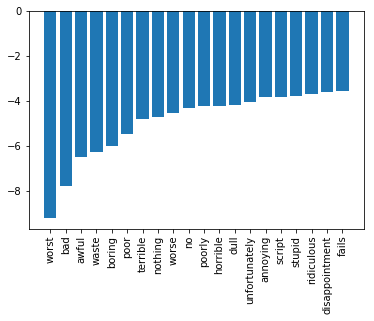

In [18]:
plt.bar(range(20), w[indexer[:20]])
plt.xticks(range(20), fn[indexer[:20]], rotation=90)
pass

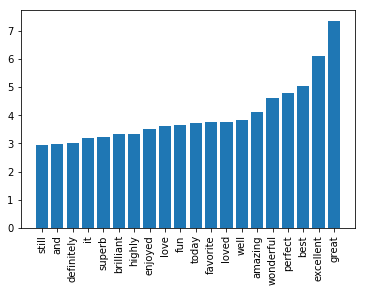

In [19]:
plt.bar(range(20), w[indexer[-20:]])
plt.xticks(range(20), fn[indexer[-20:]], rotation=90)
pass

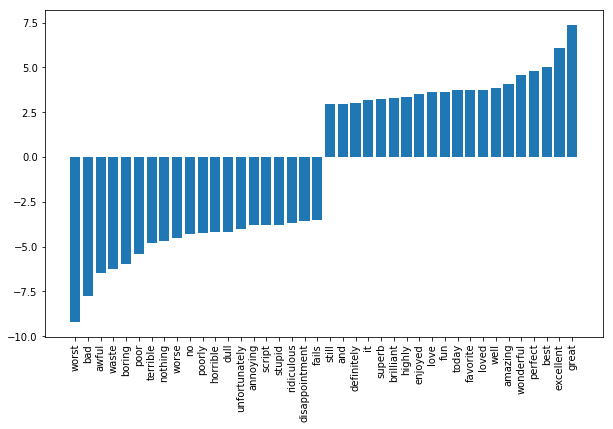

In [22]:
merge_index = np.r_[indexer[:20], indexer[-20:]]

plt.figure(figsize=[10,6])
plt.bar(range(40), w[merge_index])
plt.xticks(range(40), fn[merge_index], rotation=90)
pass

In [75]:
np.r_[indexer[:20], indexer[-20:]]

array([26966,  1970,  1896, 26422,  2968, 18363, 24272, 16630, 26958,
       16534, 18366, 11754,  7621, 25523,  1238, 21273, 23420, 20409,
        6927,  8875, 23154,  1145,  6370, 12982, 23632,  3220, 11491,
        8204, 14484,  9915, 24638,  9034, 14488, 26565,  1034, 26899,
       17789,  2485,  8576, 10641], dtype=int64)

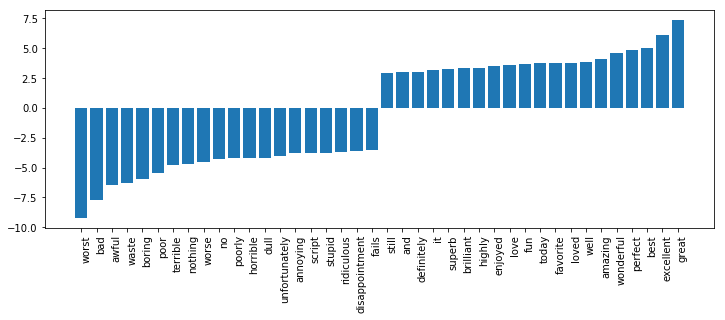

In [76]:
plt.figure(figsize=[12,4])
plt.bar(range(40),w[np.r_[indexer[:20],indexer[-20:]]])
plt.xticks(range(40), np.r_[fn[indexer[:20]], fn[indexer[-20:]]], rotation=90, ha='left')
print('')